In [1]:
import librosa 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y, sr = librosa.load(librosa.util.example_audio_file(),offset=30, duration=2.0)

In [3]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv,backtrack=False)
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
rmse = librosa.feature.rmse(S=np.abs(librosa.stft(y=y)))
onset_bt_rmse = librosa.onset.onset_backtrack(onset_raw, rmse[0])




In [4]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rmse[0], label='RMSE')
plt.vlines(onset_bt_rmse, 0, rmse.max(), label='Backtracked (RMSE)', color='r')
plt.legend(frameon=True, framealpha=0.75)

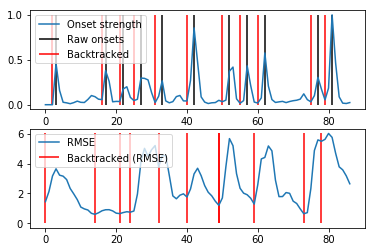

In [5]:
plt.show()